## *Généralization de data*

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

X_train, _ = make_blobs(n_samples=2000, centers=100, n_features=2, random_state=20)

## *Visualization de data*

##### Dans ce code, la fonction DataFrame de la bibliothèque pandas est utilisée pour créer un nouvel objet DataFrame de Pandas df avec deux colonnes: x et y
##### dict(x=X_train[:,0], y=X_train[:,1]) crée un dictionnaire avec deux paires clé-valeur. La clé est x et la valeur est la première colonne de X_train. La deuxième clé est y et la valeur est la deuxième colonne de X_train.

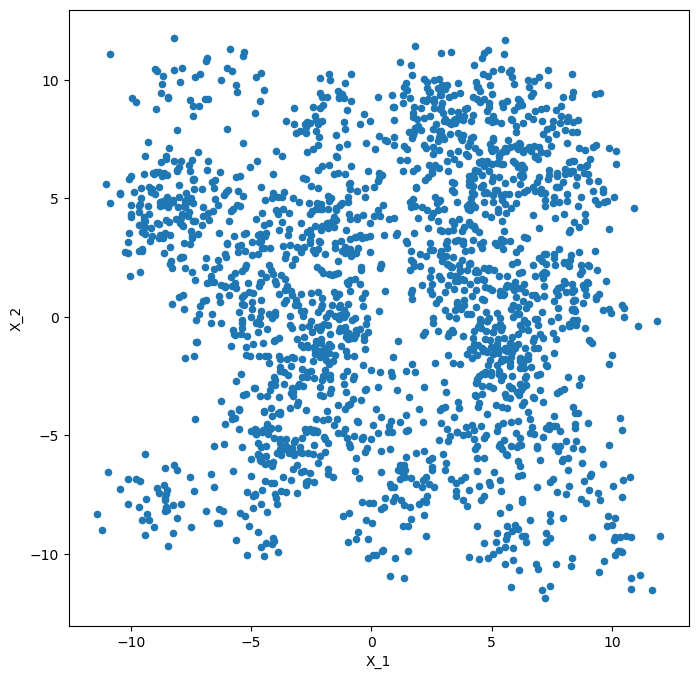

In [11]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')

plt.show()

## *Helper functions pour K-means*

##### La fonction "init_centroids" initialise les centres des k clusters en choisissant k positions aléatoires à partir des valeurs min/max des caractéristiques de l'ensemble de données X. Elle renvoie une matrice numpy contenant les positions des k centres.

In [12]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

##### La fonction "dist" calcule la distance euclidienne entre deux vecteurs numpy a et b en utilisant la formule de distance euclidienne,

In [13]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

##### La fonction "assign_cluster" prend en entrée le nombre k de clusters, l'ensemble de données X et les centres des k clusters cg. 
##### Elle affecte chaque point de données de l'ensemble X à son cluster le plus proche en calculant d'abord la distance de chaque point à tous les centres des clusters et en trouvant le centre le plus proche. Elle stocke ensuite l'indice de ce centre dans une liste de clusters et renvoie cette liste sous forme de tableau numpy.


In [14]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

##### Cette fonction calcule les nouveaux centroides en utilisant les données d'entraînement et les clusters assignés à chaque point. Elle prend trois arguments en entrée:

##### k: le nombre de clusters
##### X: les données d'entraînement
##### cluster: une liste d'entiers qui contient les identifiants de cluster assignés à chaque point
##### La fonction commence par créer une liste vide qui stockera les nouveaux centroides. Elle itère ensuite sur chaque cluster et calcule le nouveau centroide en calculant la moyenne de tous les points dans ce cluster en utilisant la fonction numpy mean. 

In [15]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

##### Cette fonction mesure le changement entre deux ensembles de centroïdes en calculant la distance entre chaque paire de centroïdes correspondants, et en additionnant ces distances. Le résultat est un seul nombre qui représente la quantité totale de changement entre les deux ensembles de centroïdes.

In [16]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

##### Ce code crée un DataFrame en utilisant les données X, les clusters et les labels correspondants, et définit des couleurs pour chaque cluster en utilisant plt.cm.Spectral. Enfin, elle crée un diagramme de dispersion en utilisant les données du DataFrame et les couleurs associées aux clusters. Le résultat est un graphique qui montre clairement les clusters et leur répartition dans l'espace.

In [17]:
from IPython.display import clear_output
def show_clusters(X, cluster, cg):
    clear_output(wait=True)
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster)))]
    fig, ax = plt.subplots(figsize=(8, 8))
    for label, color in zip(np.unique(cluster), colors):
        clustered_points = df[df.label == label]
        ax.scatter(clustered_points.x, clustered_points.y, c=[color], label=label, alpha=0.9999, edgecolors='none')
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=30, c='#000000')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    #plt.legend(loc='upper right')
    plt.show()

## *K-means*

##### Dans cette fonction, on commence par initialiser les centroids en appelant la fonction init_centroids. Ensuite, on boucle jusqu'à ce que la variation entre les anciens et les nouveaux centroids soit inférieure à 0,001. À chaque itération, on assigne chaque point de données à son centroid le plus proche à l'aide de la fonction assign_cluster, puis on calcule de nouveaux centroids en utilisant la fonction compute_centroids. Finalement, on visualise les clusters obtenus en appelant la fonction show_clusters.

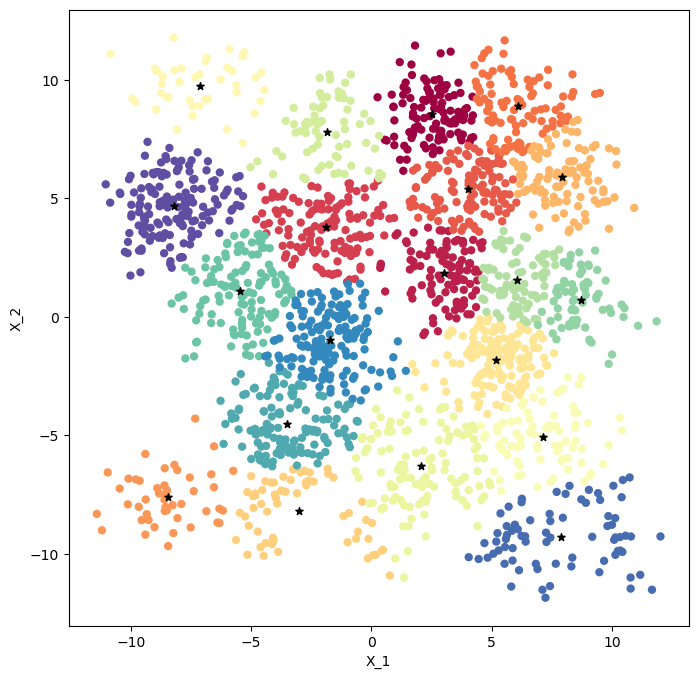

In [18]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(20, X_train)